<a href="https://www.kaggle.com/code/asdkarma/bilstm-april-tabular?scriptVersionId=98379092" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-apr-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-apr-2022/train_labels.csv
/kaggle/input/tabular-playground-series-apr-2022/train.csv
/kaggle/input/tabular-playground-series-apr-2022/test.csv


comp classify 60 secs datad thus justifing a persons state 1st and 2nd.

train.csv contains
* ~26k entries (rows)
* of 60 sec (time gaps)(subrows)
* 13 biological sensors (columns)
* for 1k experimental participants(test cases)(plus dont know how this effects the outcomes)

In [2]:
train=pd.read_csv("../input/tabular-playground-series-apr-2022/train.csv")
test=pd.read_csv("../input/tabular-playground-series-apr-2022/test.csv")

In [3]:
train_labels=pd.read_csv("../input/tabular-playground-series-apr-2022/train_labels.csv")

In [4]:
train

sequence  subject  step  sensor_00  sensor_01  sensor_02  sensor_03  \
0               0       47     0  -0.196291   0.112395   1.000000   0.329204   
1               0       47     1  -0.447450   0.134454   1.000000  -0.658407   
2               0       47     2   0.326893  -0.694328   1.000000   0.330088   
3               0       47     3   0.523184   0.751050   1.000000   0.976991   
4               0       47     4   0.272025   1.074580   1.000000  -0.136283   
...           ...      ...   ...        ...        ...        ...        ...   
1558075     25967      327    55  -0.282844  -1.217437  -1.666153   0.586726   
1558076     25967      327    56   0.130603   0.349790  -1.666153  -0.324779   
1558077     25967      327    57  -0.579598   0.429622  -1.666153   0.319469   
1558078     25967      327    58   1.278980   1.711134  -1.522820   0.802655   
1558079     25967      327    59  -1.136012  -3.702731  -1.332820  -0.766372   

         sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
0        -1.004660  -0.131638  -0.127505   0.368702       -0.1  -0.963873   
1         0.162495   0.340314  -0.209472  -0.867176        0.2  -0.301301   
2         0.473678   1.280479  -0.094718   0.535878        1.4   1.002168   
3        -0.563287  -0.720269   0.793260   0.951145       -0.3  -0.995665   
4         0.398579   0.044877   0.560109  -0.541985       -0.9   1.055636   
...            ...        ...        ...        ...        ...        ...   
1558075  -0.930698  -0.451010  -0.651184   0.368702        0.4   0.008671   
1558076   0.775324  -0.332835   0.099271   0.122137       -0.2   0.644509   
1558077   0.308861   0.282723  -0.512750   0.012214       -1.6  -0.424133   
1558078  -0.460541  -0.055348   2.405282   0.043511        1.9   0.283960   
1558079  -0.430027  -0.091997  -2.512750  -0.022901       -1.1  -0.653902   

         sensor_10  sensor_11  sensor_12  
0        -0.985069   0.531893   4.751492  
1         0.082733  -0.231481   0.454390  
2         0.449221  -0.586420  -4.736147  
3        -0.434290   1.344650   0.429241  
4         0.812631   0.123457  -0.223359  
...            ...        ...        ...  
1558075  -0.723536  -0.353909  -0.914749  
1558076   0.691407  -0.613169  -0.515772  
1558077   0.716855   1.628601   0.928389  
1558078  -0.914914   0.364198   0.211424  
1558079  -0.418516  -1.453704  -1.561381  

[1558080 rows x 16 columns]

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558080 entries, 0 to 1558079
Data columns (total 16 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   sequence   1558080 non-null  int64  
 1   subject    1558080 non-null  int64  
 2   step       1558080 non-null  int64  
 3   sensor_00  1558080 non-null  float64
 4   sensor_01  1558080 non-null  float64
 5   sensor_02  1558080 non-null  float64
 6   sensor_03  1558080 non-null  float64
 7   sensor_04  1558080 non-null  float64
 8   sensor_05  1558080 non-null  float64
 9   sensor_06  1558080 non-null  float64
 10  sensor_07  1558080 non-null  float64
 11  sensor_08  1558080 non-null  float64
 12  sensor_09  1558080 non-null  float64
 13  sensor_10  1558080 non-null  float64
 14  sensor_11  1558080 non-null  float64
 15  sensor_12  1558080 non-null  float64
dtypes: float64(13), int64(3)
memory usage: 190.2 MB


In [6]:
a=train.groupby(sort=False,by="sequence").mean()

In [7]:
a=train.subject.unique()
a=np.array(a)
len(a)

672

In [8]:
a.sort()
l=a==[i for i in range(0,672)]
if l.all():
    print("TRue")
    

TRue


In [9]:
train_labels
train[["sequence","subject"]].iloc[60:60+60] 
#implication --> sequence corresponds to an explicit subjects
#train=train.drop("subject",axis=1)
train

sequence  subject  step  sensor_00  sensor_01  sensor_02  sensor_03  \
0               0       47     0  -0.196291   0.112395   1.000000   0.329204   
1               0       47     1  -0.447450   0.134454   1.000000  -0.658407   
2               0       47     2   0.326893  -0.694328   1.000000   0.330088   
3               0       47     3   0.523184   0.751050   1.000000   0.976991   
4               0       47     4   0.272025   1.074580   1.000000  -0.136283   
...           ...      ...   ...        ...        ...        ...        ...   
1558075     25967      327    55  -0.282844  -1.217437  -1.666153   0.586726   
1558076     25967      327    56   0.130603   0.349790  -1.666153  -0.324779   
1558077     25967      327    57  -0.579598   0.429622  -1.666153   0.319469   
1558078     25967      327    58   1.278980   1.711134  -1.522820   0.802655   
1558079     25967      327    59  -1.136012  -3.702731  -1.332820  -0.766372   

         sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
0        -1.004660  -0.131638  -0.127505   0.368702       -0.1  -0.963873   
1         0.162495   0.340314  -0.209472  -0.867176        0.2  -0.301301   
2         0.473678   1.280479  -0.094718   0.535878        1.4   1.002168   
3        -0.563287  -0.720269   0.793260   0.951145       -0.3  -0.995665   
4         0.398579   0.044877   0.560109  -0.541985       -0.9   1.055636   
...            ...        ...        ...        ...        ...        ...   
1558075  -0.930698  -0.451010  -0.651184   0.368702        0.4   0.008671   
1558076   0.775324  -0.332835   0.099271   0.122137       -0.2   0.644509   
1558077   0.308861   0.282723  -0.512750   0.012214       -1.6  -0.424133   
1558078  -0.460541  -0.055348   2.405282   0.043511        1.9   0.283960   
1558079  -0.430027  -0.091997  -2.512750  -0.022901       -1.1  -0.653902   

         sensor_10  sensor_11  sensor_12  
0        -0.985069   0.531893   4.751492  
1         0.082733  -0.231481   0.454390  
2         0.449221  -0.586420  -4.736147  
3        -0.434290   1.344650   0.429241  
4         0.812631   0.123457  -0.223359  
...            ...        ...        ...  
1558075  -0.723536  -0.353909  -0.914749  
1558076   0.691407  -0.613169  -0.515772  
1558077   0.716855   1.628601   0.928389  
1558078  -0.914914   0.364198   0.211424  
1558079  -0.418516  -1.453704  -1.561381  

[1558080 rows x 16 columns]

In [10]:
train_sequence=[]
train_labels

sequence  state
0             0      0
1             1      1
2             2      1
3             3      1
4             4      1
...         ...    ...
25963     25963      1
25964     25964      0
25965     25965      1
25966     25966      1
25967     25967      0

[25968 rows x 2 columns]

In [11]:
for i in train.groupby(sort=False,by="sequence"):
    train_sequence.append(i)
train_sequence[1][1].head()

sequence  subject  step  sensor_00  sensor_01  sensor_02  sensor_03  \
60         1       66     0  -6.657651  -0.141807  -2.332306  -0.715929   
61         1       66     1   1.633694   0.586134  -2.127622   5.637168   
62         1       66     2   1.863215  -2.143908  -1.999486  -4.159292   
63         1       66     3  -2.846213   2.011555  -1.999486  -1.711504   
64         1       66     4   0.593509  -0.613445  -1.999486   0.957522   

    sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
60   0.789225  -0.483919  -4.568306  -1.439695       -0.1  -3.517341   
61   0.613359  -1.287958  -0.885246   5.390076        0.5   0.632225   
62  -1.417513   1.674645   2.775046  -3.859542       -1.2   1.471098   
63  -1.344486  -4.602842  -3.163024  -0.782443        2.0  -1.801301   
64   0.457159   4.559461   2.064663  -0.348855       -1.8   0.253613   

    sensor_10  sensor_11   sensor_12  
60   1.168139   1.524691  -12.446718  
61   1.181617   2.386831   84.491049  
62  -1.918923  -3.511317  -35.938193  
63  -1.276174   0.851852 -160.234442  
64   1.436149   0.111111   -9.145354

In [12]:
def call(df,seq):
    return df[seq][1]
call(train_sequence,1).head()

sequence  subject  step  sensor_00  sensor_01  sensor_02  sensor_03  \
60         1       66     0  -6.657651  -0.141807  -2.332306  -0.715929   
61         1       66     1   1.633694   0.586134  -2.127622   5.637168   
62         1       66     2   1.863215  -2.143908  -1.999486  -4.159292   
63         1       66     3  -2.846213   2.011555  -1.999486  -1.711504   
64         1       66     4   0.593509  -0.613445  -1.999486   0.957522   

    sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
60   0.789225  -0.483919  -4.568306  -1.439695       -0.1  -3.517341   
61   0.613359  -1.287958  -0.885246   5.390076        0.5   0.632225   
62  -1.417513   1.674645   2.775046  -3.859542       -1.2   1.471098   
63  -1.344486  -4.602842  -3.163024  -0.782443        2.0  -1.801301   
64   0.457159   4.559461   2.064663  -0.348855       -1.8   0.253613   

    sensor_10  sensor_11   sensor_12  
60   1.168139   1.524691  -12.446718  
61   1.181617   2.386831   84.491049  
62  -1.918923  -3.511317  -35.938193  
63  -1.276174   0.851852 -160.234442  
64   1.436149   0.111111   -9.145354

# seperating indexes for 1's and 0's reading to understand the data

In [13]:
train_labels
zeros_index=[]
ones_index=[]
for i in range(len(train_labels)):
    if train_labels["state"].iloc[i]==1:
        ones_index.append(i)
    else:
        zeros_index.append(i)
print(len(ones_index),len(zeros_index))

13014 12954


almost equal ones and zeros to train :)

# visualising senosory data

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
features_sen=[i for i in train.columns if "sensor" in i]
#call(train_sequence,j)["sensor_00"]

# superimposed reading

In [16]:
def super_imp(arr,tt=train_sequence):
    for i in features_sen:
        plt.figure(figsize=(18, 3))
        for j in arr:#add any to the bracket for comparing in one
            l=call(tt,j)
            l=l.set_index("step")
            plt.plot(l[i])#x=60,y=values of column
        plt.legend(arr)
        plt.title(str(i))
        plt.show()

# comparsion

In [17]:
from random import shuffle

# displaying ones

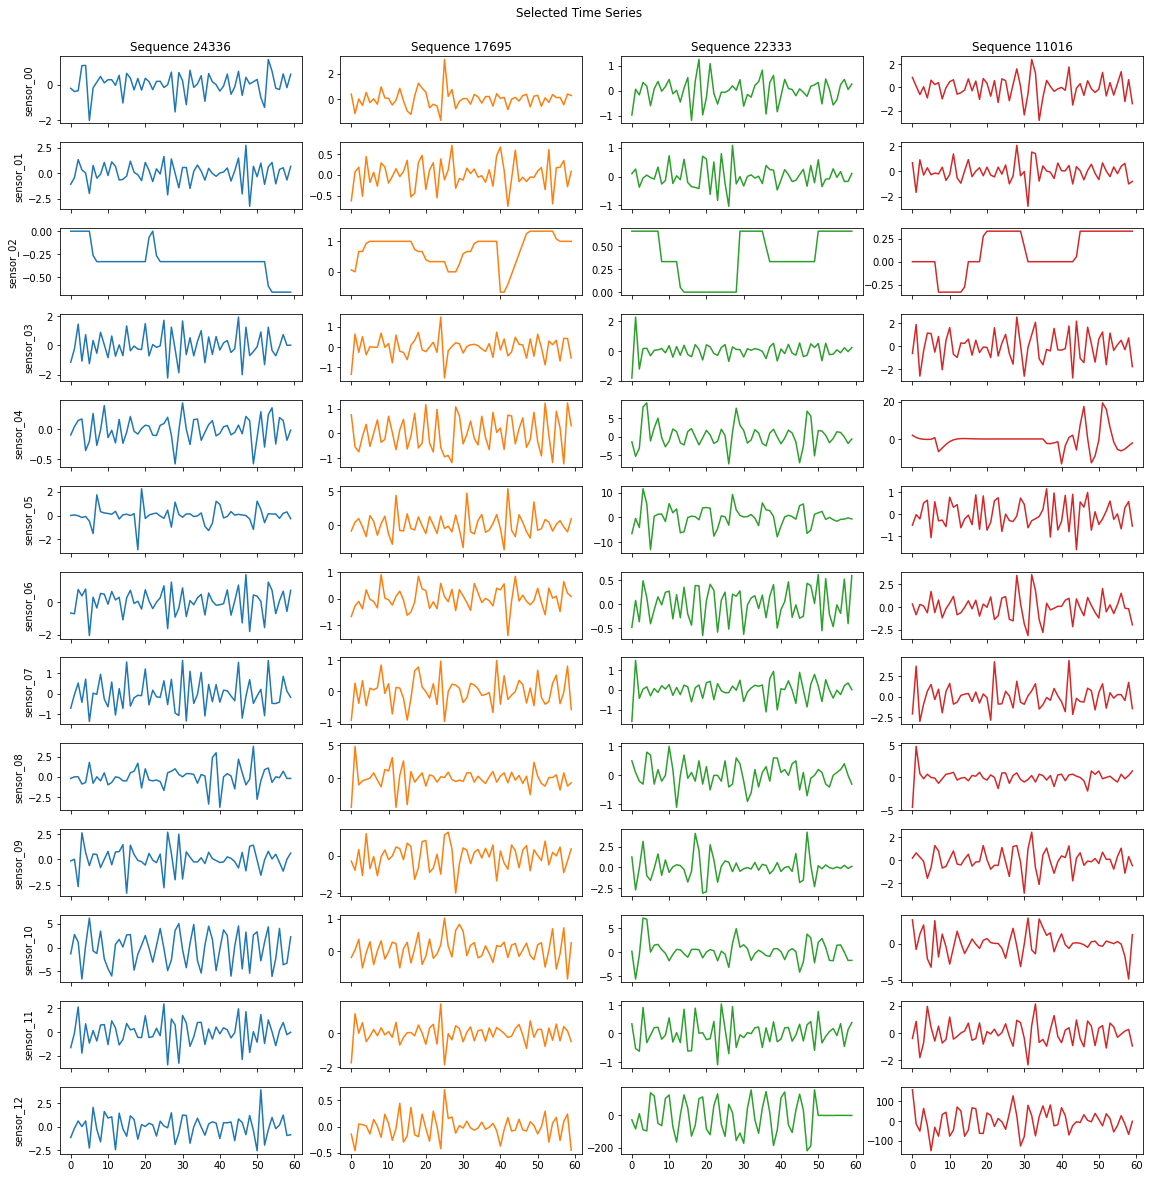

       state
24336      1
17695      1
22333      1
11016      1


In [18]:
train_df=train.copy()
features=features_sen
shuffle(ones_index)
sequences = ones_index[:4]#[0, 1, 2, 8364, 15404,]
figure, axes = plt.subplots(13, len(sequences), sharex=True, figsize=(16, 16))
for i, sequence in enumerate(sequences):
    for sensor in range(13):
        sensor_name = f"sensor_{sensor:02d}"
        plt.subplot(13, len(sequences), sensor * len(sequences) + i + 1)
        plt.plot(range(60), train_df[train_df.sequence == sequence][sensor_name],
                color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i % 10])
        if sensor == 0: plt.title(f"Sequence {sequence}")
        if sequence == sequences[0]: plt.ylabel(sensor_name)
figure.tight_layout(w_pad=0.1)
plt.suptitle('Selected Time Series', y=1.02)
plt.show()
print(train_labels.loc[sequences,["state"]])
sequences_1=sequences

# displaying zeros

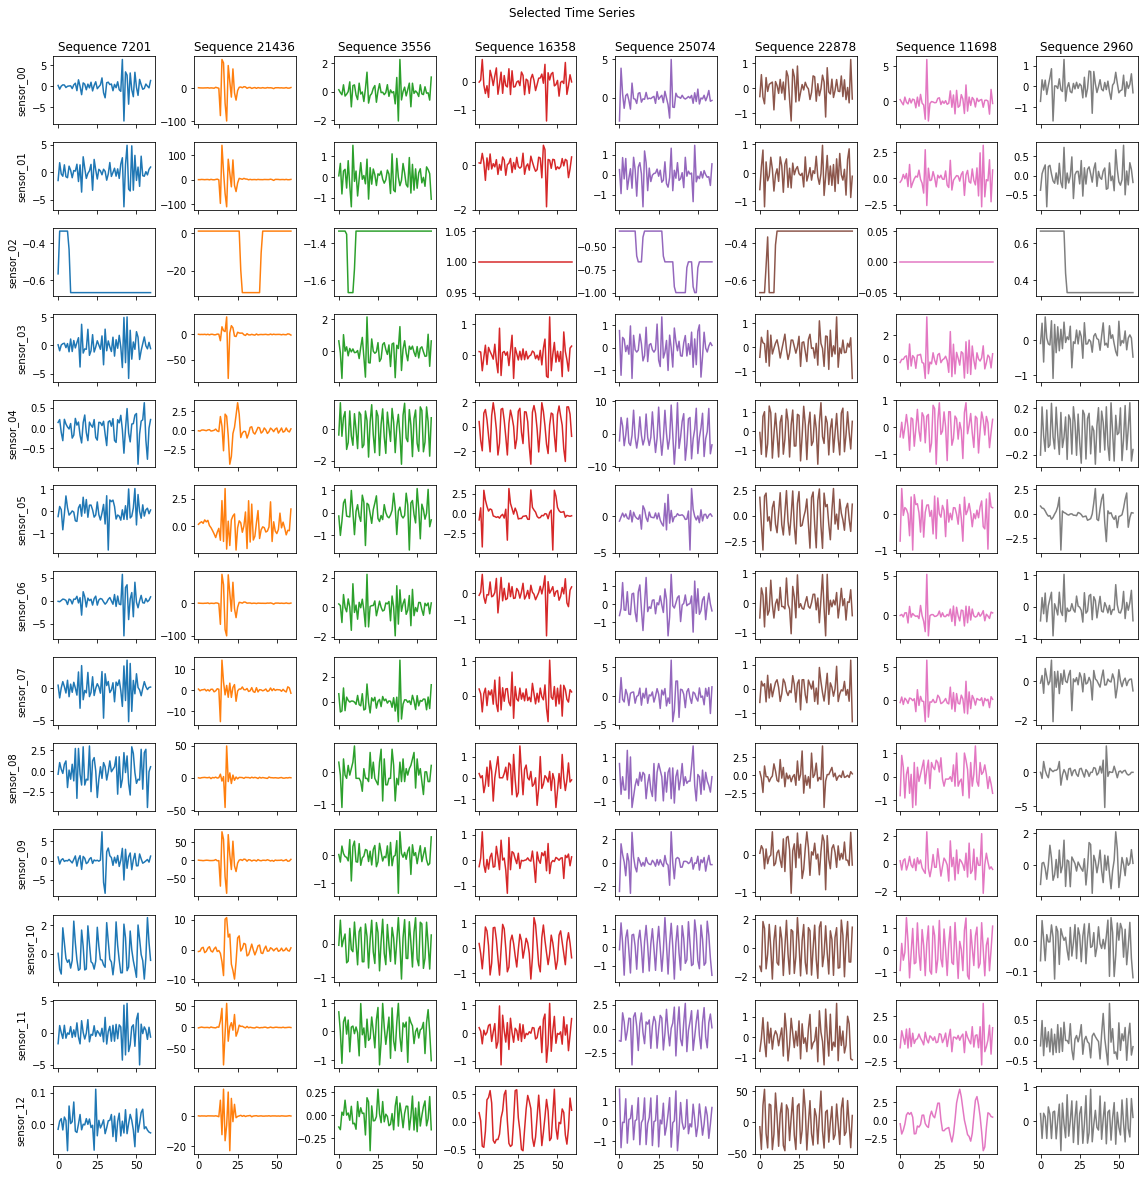

       state
7201       0
21436      0
3556       0
16358      0
25074      0
22878      0
11698      0
2960       0


In [19]:
train_df=train.copy()
features=features_sen
shuffle(zeros_index)
sequences_0 = zeros_index[:8]#[0, 1, 2, 8364, 15404,]
sequences=sequences_0
figure, axes = plt.subplots(13, len(sequences), sharex=True, figsize=(16, 16))
for i, sequence in enumerate(sequences):
    for sensor in range(13):
        sensor_name = f"sensor_{sensor:02d}"
        plt.subplot(13, len(sequences), sensor * len(sequences) + i + 1)
        plt.plot(range(60), train_df[train_df.sequence == sequence][sensor_name],
                color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i % 10])
        if sensor == 0: plt.title(f"Sequence {sequence}")
        if sequence == sequences[0]: plt.ylabel(sensor_name)
figure.tight_layout(w_pad=0.1)
plt.suptitle('Selected Time Series', y=1.02)
plt.show()
print(train_labels.loc[sequences_0,["state"]])

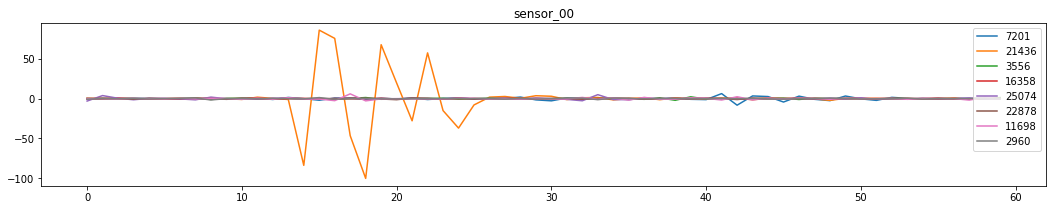

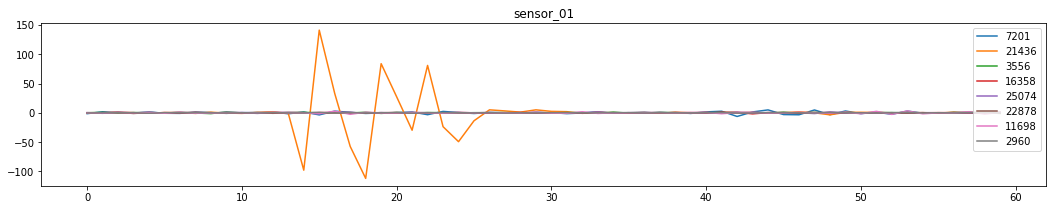

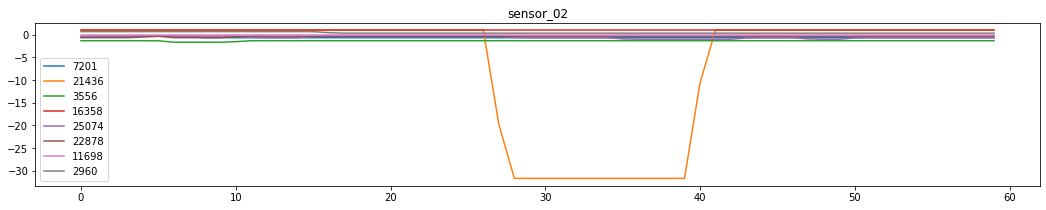

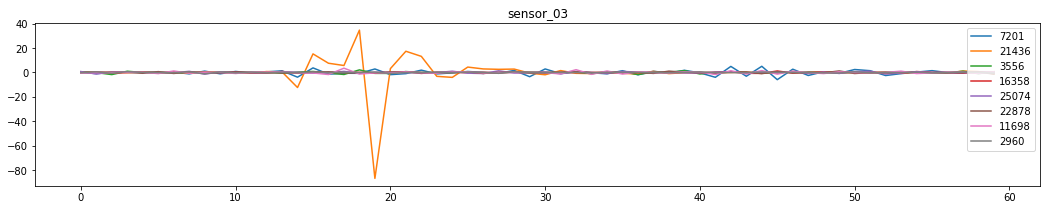

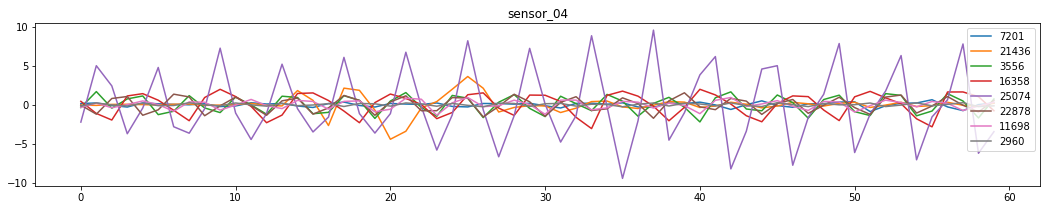

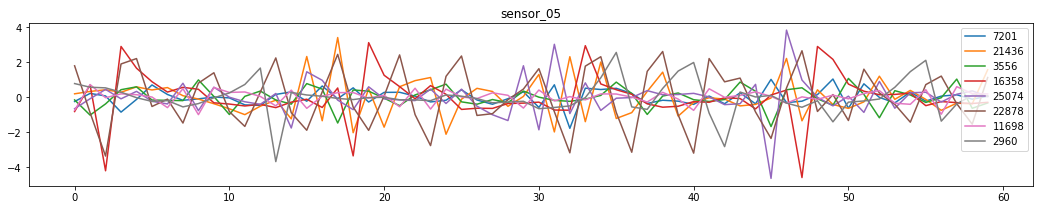

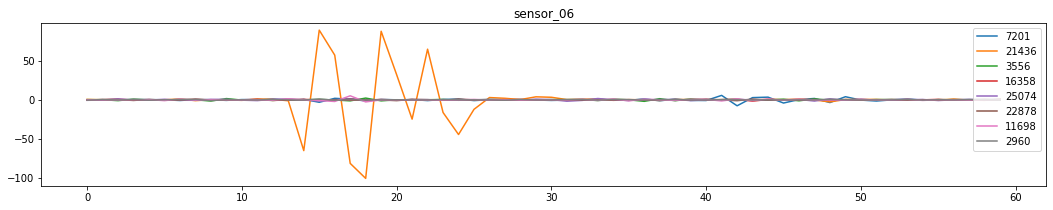

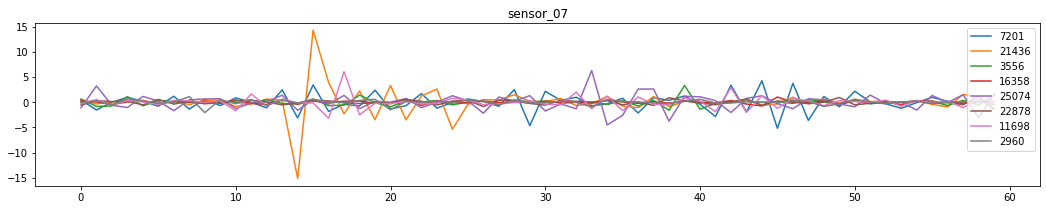

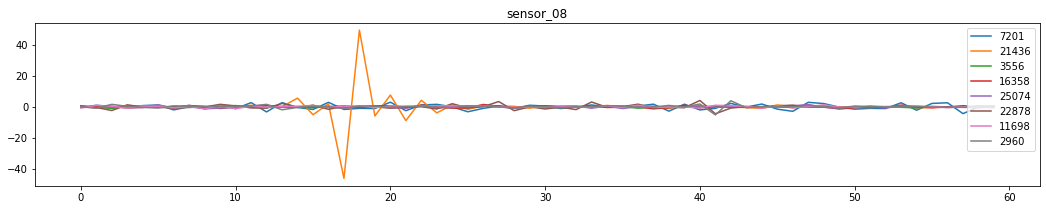

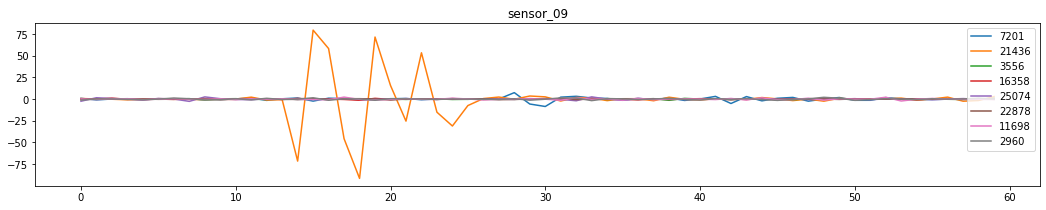

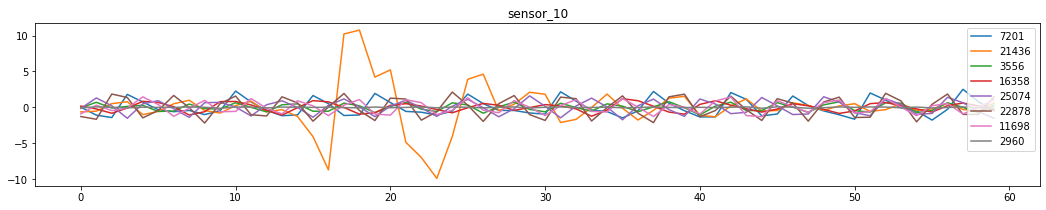

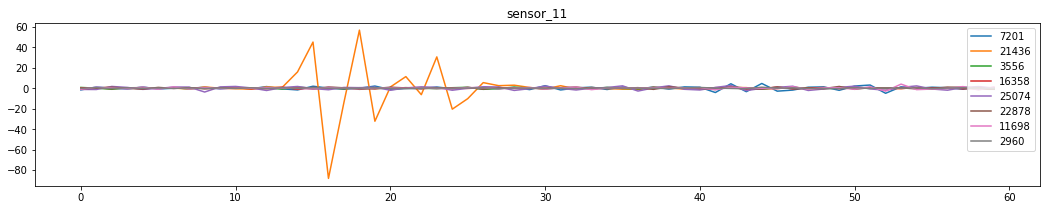

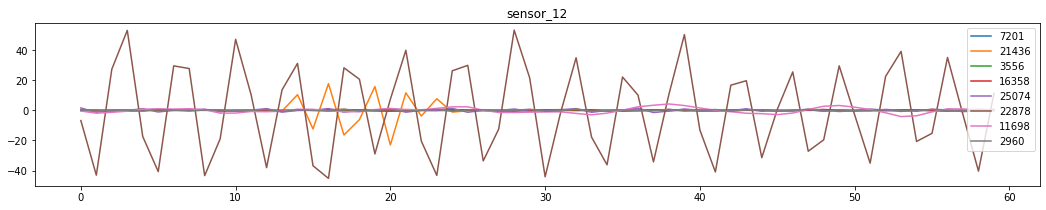

In [20]:
super_imp(sequences_0)

pass data through a function to remove noise while maintsing integrity of the data


In [21]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
mydata = pd.read_csv('../input/tabular-playground-series-apr-2022/train.csv', names = ['value'], header = 0) 
mydata
print(1)
#res=adfuller(mydata.value.dropna())
print(2)

#res

1
2


In [22]:
#dickey fuller test for stationarity since applying arima model p<0.005
no_adfs=[]
for i in range(25968):
    re=adfuller(mydata["value"][i])
    if re[1]<=0.005:
        pass
    else:
        no_adfs.append(i)
    if i in [25968,int(25968*(0.75)),int(25968*(0.5)),int(25968*(0.25)),0]:
        print(i,end=" ")

0 

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/opt/

6492 

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


12984 

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


19476 

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [23]:
len(no_adfs),len(train)
len(mydata.value[0])

60

In [24]:
train["index"]=range(len(train))
a=train.set_index("sequence",False).drop(no_adfs,axis=0)
b=train.set_index("index")
tt=[]
for i in b.groupby(sort=False,by="sequence"):
    tt.append(i)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only
  


In [25]:
train_2=a

# build model

In [26]:
#copied code for testing
def BuildNN():
    model = keras.models.Sequential([
        keras.layers.Input(shape=(60, cols)),
        keras.layers.Conv1D(32*2, 7),
        
        #keras.layers.BatchNormalization(),
        
        #keras.layers.Bidirectional(keras.layers.LSTM(700, return_sequences=True)),
        
        #keras.layers.Bidirectional(keras.layers.LSTM(700, return_sequences=True)),
        keras.layers.Bidirectional(keras.layers.LSTM(768, return_sequences=True)),
        #keras.layers.Bidirectional(keras.layers.GRU(units=256,return_sequences=True)),
        keras.layers.Bidirectional(keras.layers.LSTM(512, return_sequences=True)),
        keras.layers.Bidirectional(keras.layers.GRU(units=256,return_sequences=True)),
        keras.layers.Bidirectional(keras.layers.LSTM(256, return_sequences=True)),
        
        #keras.layers.Conv1D(32*2, 7),
        keras.layers.MaxPooling1D(),
        
        keras.layers.Conv1D(64*2, 3),
        keras.layers.MaxPooling1D(),
        
        keras.layers.Conv1D(128*2, 3),
        keras.layers.GlobalMaxPooling1D(),
        
        keras.layers.Dense(150, activation="swish"),
        keras.layers.Dense(100, activation="selu"),#(swish everything else remains same)
        keras.layers.Dense(1, activation="sigmoid")
    ])

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=[keras.metrics.AUC()])
    return model

In [27]:
def dnn_model():
    
    x_input =keras.layers.Input(shape=(60, cols))
    
    x1 = keras.layers.Bidirectional(keras.layers.LSTM(units=512, return_sequences=True))(x_input)
    x2 = keras.layers.Bidirectional(keras.layers.LSTM(units=384, return_sequences=True))(x1)
    z1 = keras.layers.Bidirectional(keras.layers.GRU(units=384, return_sequences=True))(x1)
    
    c = keras.layers.Concatenate(axis=2)([x2, z1])
    
    x3 = keras.layers.Bidirectional(keras.layers.LSTM(units=256, return_sequences=True))(c)
    x30=keras.layers.Bidirectional(keras.layers.LSTM(units=256,return_sequences=True))(x1)
    
    c1=keras.layers.Concatenate(axis=2)([x3,x30])
    #x33=keras.layers.Bidirectional(keras.layers.LSTM(units=128))
    #x31=keras.layers.Conv1D(32*2, 7)(c1)
    #x32=keras.layers.MaxPooling1D()(x31)
    
    #x33=keras.layers.Conv1D(64*2, 3)(x32)
    #x34=keras.layers.MaxPooling1D()(x33)
    #x35=keras.layers.Conv1D(128, 3)(x34)
    x4 = keras.layers.GlobalMaxPooling1D()(c1)
    x41=keras.layers.Dense(units=128,activation="selu")(x4)
    #x5 = keras.layers.Dense(units=100, activation='swish')(x41)
    x42=keras.layers.Dropout(0.05)(x41)
    x_output = keras.layers.Dense(1, activation='sigmoid')(x42)

    model = keras.models.Model(inputs=x_input, outputs=x_output, name='lstm_model')
    
    return model

In [28]:
import tensorflow as tf
from tensorflow import keras
from IPython.display import display
from sklearn.model_selection import GroupKFold
from sklearn.metrics import roc_auc_score

In [29]:
'''tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)'''

'tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()\ntpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)'

# modifying feature 2 in train_2 and test

In [30]:
train_2.head()

sequence  subject  step  sensor_00  sensor_01  sensor_02  sensor_03  \
sequence                                                                        
1                1       66     0  -6.657651  -0.141807  -2.332306  -0.715929   
1                1       66     1   1.633694   0.586134  -2.127622   5.637168   
1                1       66     2   1.863215  -2.143908  -1.999486  -4.159292   
1                1       66     3  -2.846213   2.011555  -1.999486  -1.711504   
1                1       66     4   0.593509  -0.613445  -1.999486   0.957522   

          sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
sequence                                                                     
1          0.789225  -0.483919  -4.568306  -1.439695       -0.1  -3.517341   
1          0.613359  -1.287958  -0.885246   5.390076        0.5   0.632225   
1         -1.417513   1.674645   2.775046  -3.859542       -1.2   1.471098   
1         -1.344486  -4.602842  -3.163024  -0.782443        2.0  -1.801301   
1          0.457159   4.559461   2.064663  -0.348855       -1.8   0.253613   

          sensor_10  sensor_11   sensor_12  index  
sequence                                           
1          1.168139   1.524691  -12.446718     60  
1          1.181617   2.386831   84.491049     61  
1         -1.918923  -3.511317  -35.938193     62  
1         -1.276174   0.851852 -160.234442     63  
1          1.436149   0.111111   -9.145354     64

[1, 4, 9]

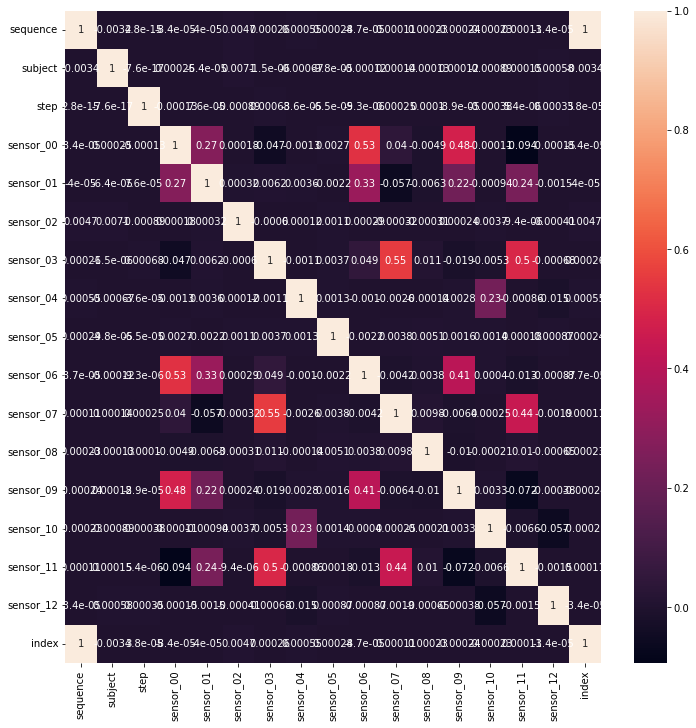

In [31]:
a=train_2.corr()
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(a,annot=True)
R_2_n=[]
for i in range(4,len(a["sensor_02"])):
    if (a["sensor_02"][i]**2)**(0.5)>0.001:
        R_2_n.append(i-4)
R_2_n=R_2_n[:-1]
R_2_n

sequence  subject  step  sensor_00  sensor_01  sensor_02  sensor_03  \
sequence                                                                        
1                1       66     0  -6.657651  -0.141807  -0.037406  -0.715929   
1                1       66     1   1.633694   0.586134  -1.508072   5.637168   
1                1       66     2   1.863215  -2.143908   4.853574  -4.159292   
1                1       66     3  -2.846213   2.011555  -3.484420  -1.711504   
1                1       66     4   0.593509  -0.613445   1.043759   0.957522   
...            ...      ...   ...        ...        ...        ...        ...   
25966        25966      170    55   0.598918  -1.040966   0.122610  -1.096460   
25966        25966      170    56  -0.129830   1.248950   0.000000   0.635398   
25966        25966      170    57  -0.648377  -0.957983  -0.000000   0.112389   
25966        25966      170    58  -0.059505   0.066176   0.000000  -0.184071   
25966        25966      170    59   0.677743   0.343487   0.000000   0.340708   

          sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
sequence                                                                     
1          0.789225  -0.483919  -4.568306  -1.439695       -0.1  -3.517341   
1          0.613359  -1.287958  -0.885246   5.390076        0.5   0.632225   
1         -1.417513   1.674645   2.775046  -3.859542       -1.2   1.471098   
1         -1.344486  -4.602842  -3.163024  -0.782443        2.0  -1.801301   
1          0.457159   4.559461   2.064663  -0.348855       -1.8   0.253613   
...             ...        ...        ...        ...        ...        ...   
25966      1.520867   0.111444  -0.210383  -0.245802       -0.4   1.003613   
25966      0.220343   0.296933   0.756831   0.472519        1.2  -0.393786   
25966     -0.283475  -0.212416  -0.824226  -0.293893       -0.6  -0.616329   
25966     -0.160127   0.109200   0.182149  -0.439695        0.2   0.266618   
25966      1.194708  -0.301421   0.195811   0.841221       -0.4  -0.158960   

          sensor_10  sensor_11   sensor_12    index  
sequence                                             
1          1.168139   1.524691  -12.446718       60  
1          1.181617   2.386831   84.491049       61  
1         -1.918923  -3.511317  -35.938193       62  
1         -1.276174   0.851852 -160.234442       63  
1          1.436149   0.111111   -9.145354       64  
...             ...        ...         ...      ...  
25966      2.374332  -2.202675    9.170077  1558015  
25966      0.974988   1.439300    6.789855  1558016  
25966      0.014990   0.311728  -15.287298  1558017  
25966      1.415640  -0.722222  -10.659847  1558018  
25966      2.834534  -0.021605   19.436914  1558019  

[1395300 rows x 17 columns]

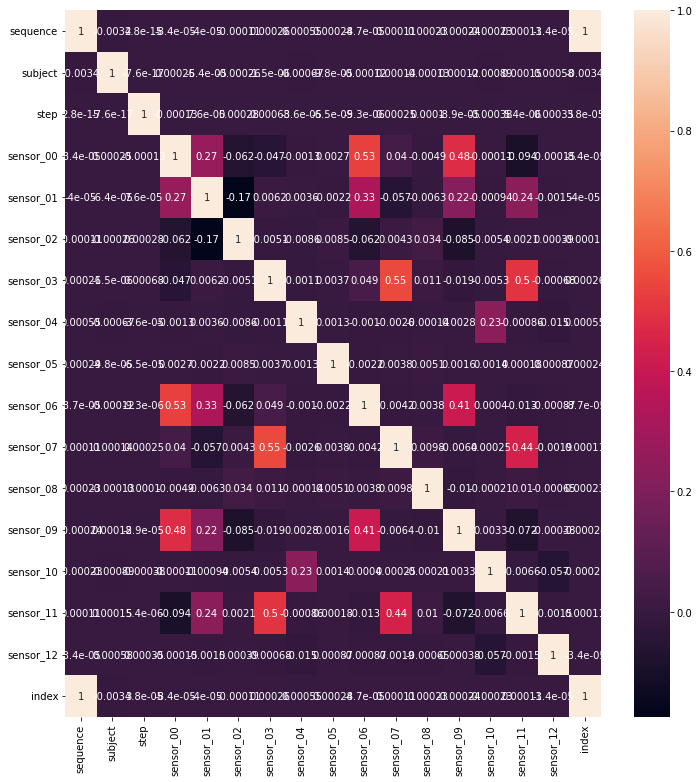

In [32]:
s_2_n=[list(train_2["sensor_02"])]+[list(train_2["sensor_0"+str(i)]) for i in R_2_n]
trial=train_2.copy()
k=list(np.array(s_2_n[0])*(np.array(s_2_n[1])+(0.2)*np.array(s_2_n[2])))
trial["sensor_02"]=k
#/np.array(s_2_n[3])))
plt.figure(figsize=(12,13))
sns.heatmap(trial.corr(),annot=True)
trial

GOOD CORR IN 2 OBTAINED ,THERFORE NOT GOING TO DROP SENS-2 

In [33]:
'''train_2["sensor_02"]=k
s_2_n=[list(test["sensor_02"])]
s_2_n+=[list(test["sensor_0"+str(i)]) for i in R_2_n]
test["sensor_02"]=list(np.array(s_2_n[0])*(np.array(s_2_n[1])+(0.2)*np.array(s_2_n[2])))
train_2.head()'''

'train_2["sensor_02"]=k\ns_2_n=[list(test["sensor_02"])]\ns_2_n+=[list(test["sensor_0"+str(i)]) for i in R_2_n]\ntest["sensor_02"]=list(np.array(s_2_n[0])*(np.array(s_2_n[1])+(0.2)*np.array(s_2_n[2])))\ntrain_2.head()'

not doing any cahnges with sensor 2 as it leads to over fitting


# Adding other features


In [34]:
train_2.head()

sequence  subject  step  sensor_00  sensor_01  sensor_02  sensor_03  \
sequence                                                                        
1                1       66     0  -6.657651  -0.141807  -2.332306  -0.715929   
1                1       66     1   1.633694   0.586134  -2.127622   5.637168   
1                1       66     2   1.863215  -2.143908  -1.999486  -4.159292   
1                1       66     3  -2.846213   2.011555  -1.999486  -1.711504   
1                1       66     4   0.593509  -0.613445  -1.999486   0.957522   

          sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
sequence                                                                     
1          0.789225  -0.483919  -4.568306  -1.439695       -0.1  -3.517341   
1          0.613359  -1.287958  -0.885246   5.390076        0.5   0.632225   
1         -1.417513   1.674645   2.775046  -3.859542       -1.2   1.471098   
1         -1.344486  -4.602842  -3.163024  -0.782443        2.0  -1.801301   
1          0.457159   4.559461   2.064663  -0.348855       -1.8   0.253613   

          sensor_10  sensor_11   sensor_12  index  
sequence                                           
1          1.168139   1.524691  -12.446718     60  
1          1.181617   2.386831   84.491049     61  
1         -1.918923  -3.511317  -35.938193     62  
1         -1.276174   0.851852 -160.234442     63  
1          1.436149   0.111111   -9.145354     64

In [35]:
train_2=train_2.set_index("index")
features = train_2.columns.tolist()[3:]
train_2

sequence  subject  step  sensor_00  sensor_01  sensor_02  sensor_03  \
index                                                                          
60              1       66     0  -6.657651  -0.141807  -2.332306  -0.715929   
61              1       66     1   1.633694   0.586134  -2.127622   5.637168   
62              1       66     2   1.863215  -2.143908  -1.999486  -4.159292   
63              1       66     3  -2.846213   2.011555  -1.999486  -1.711504   
64              1       66     4   0.593509  -0.613445  -1.999486   0.957522   
...           ...      ...   ...        ...        ...        ...        ...   
1558015     25966      170    55   0.598918  -1.040966  -0.166410  -1.096460   
1558016     25966      170    56  -0.129830   1.248950   0.000000   0.635398   
1558017     25966      170    57  -0.648377  -0.957983   0.000000   0.112389   
1558018     25966      170    58  -0.059505   0.066176   0.000000  -0.184071   
1558019     25966      170    59   0.677743   0.343487   0.000000   0.340708   

         sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
index                                                                       
60        0.789225  -0.483919  -4.568306  -1.439695       -0.1  -3.517341   
61        0.613359  -1.287958  -0.885246   5.390076        0.5   0.632225   
62       -1.417513   1.674645   2.775046  -3.859542       -1.2   1.471098   
63       -1.344486  -4.602842  -3.163024  -0.782443        2.0  -1.801301   
64        0.457159   4.559461   2.064663  -0.348855       -1.8   0.253613   
...            ...        ...        ...        ...        ...        ...   
1558015   1.520867   0.111444  -0.210383  -0.245802       -0.4   1.003613   
1558016   0.220343   0.296933   0.756831   0.472519        1.2  -0.393786   
1558017  -0.283475  -0.212416  -0.824226  -0.293893       -0.6  -0.616329   
1558018  -0.160127   0.109200   0.182149  -0.439695        0.2   0.266618   
1558019   1.194708  -0.301421   0.195811   0.841221       -0.4  -0.158960   

         sensor_10  sensor_11   sensor_12  
index                                      
60        1.168139   1.524691  -12.446718  
61        1.181617   2.386831   84.491049  
62       -1.918923  -3.511317  -35.938193  
63       -1.276174   0.851852 -160.234442  
64        1.436149   0.111111   -9.145354  
...            ...        ...         ...  
1558015   2.374332  -2.202675    9.170077  
1558016   0.974988   1.439300    6.789855  
1558017   0.014990   0.311728  -15.287298  
1558018   1.415640  -0.722222  -10.659847  
1558019   2.834534  -0.021605   19.436914  

[1395300 rows x 16 columns]

In [36]:
def prep(df):
    for feature in features:
        df[feature + '_lag1'] = df.groupby('sequence')[feature].shift(1)
        df.fillna(0, inplace=True)
        df[feature + '_diff1'] = df[feature] - df[feature + '_lag1'] 
prep(train_2)
prep(test)

<AxesSubplot:>

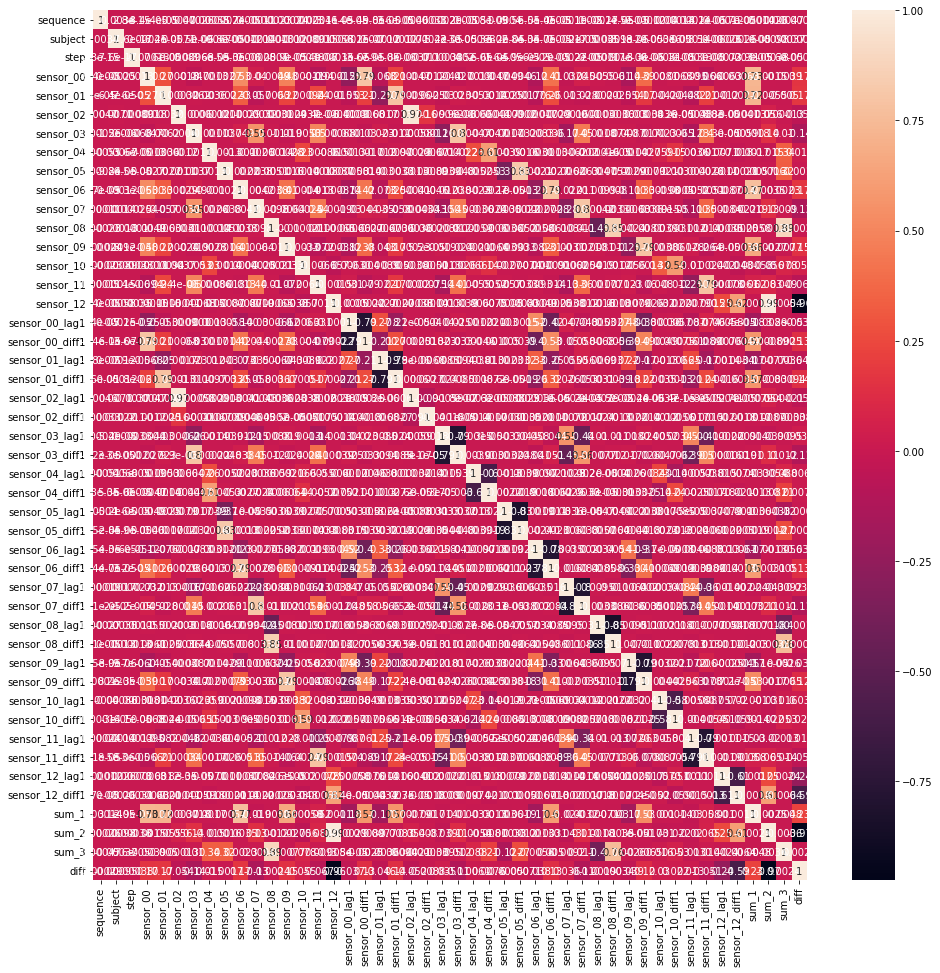

In [37]:
#sumation of different columns
s=train_2["sensor_00"]+train_2["sensor_01"]+train_2["sensor_06"]+train_2["sensor_09"]
s1=train_2["sensor_02"]+train_2["sensor_03"]+train_2["sensor_07"]+train_2["sensor_12"]
s2=train_2["sensor_08"]+train_2["sensor_04"]+train_2["sensor_05"]
d=s-s1
train_2["sum_1"]=s
train_2["sum_2"]=s1
train_2["sum_3"]=s2
train_2["diff"]=d
#train_2["diff1"]=s-s2
plt.figure(figsize=(16,16))
sns.heatmap(train_2.corr(),annot=True)

good results converting test too

In [38]:
s=test["sensor_00"]+test["sensor_01"]+test["sensor_06"]+test["sensor_09"]
s1=test["sensor_02"]+test["sensor_03"]+test["sensor_07"]+test["sensor_12"]
s2=test["sensor_08"]+test["sensor_04"]+test["sensor_05"]
d=s-s1
test["sum_1"]=s
test["sum_2"]=s1
test["sum_3"]=s2
test["diff"]=d
#test["diff1"]=s-s2

In [39]:
train_2.head()
test.head()

sequence  subject  step  sensor_00  sensor_01  sensor_02  sensor_03  \
0     25968      684     0   2.427357  19.639706        1.0  -1.466372   
1     25968      684     1  -4.950541 -21.747899        1.0   0.983186   
2     25968      684     2   1.136012 -10.756303        1.0   1.016814   
3     25968      684     3   0.806028   6.504202        1.0  -0.179646   
4     25968      684     4   1.288253   5.552521        1.0  -0.493805   

   sensor_04  sensor_05  sensor_06  ...  sensor_10_lag1  sensor_10_diff1  \
0  -1.289973  -4.207928   2.486339  ...        0.000000        -1.673048   
1  -0.569053   1.845924  -3.887978  ...       -1.673048         0.790815   
2   0.964157   2.454749   0.312386  ...       -0.882233         2.407506   
3   0.969221  -1.035153  -0.457195  ...        1.525273        -0.916512   
4  -1.036124  -1.126402   2.008197  ...        0.608761        -1.868377   

   sensor_11_lag1  sensor_11_diff1  sensor_12_lag1  sensor_12_diff1  \
0        0.000000        10.980453        0.000000         0.419011   
1       10.980453       -12.851852        0.419011        -0.427536   
2       -1.871399        -9.712963       -0.008525         0.148338   
3      -11.584362         7.342593        0.139812        -0.602728   
4       -4.241770         3.769547       -0.462916         0.341432   

       sum_1     sum_2     sum_3       diff  
0  23.429847 -2.541254  2.502099  25.971101  
1 -30.191187  3.702142 -1.623129 -33.893329  
2  -8.193742  3.310825 -2.181094 -11.504567  
3   6.264162  0.612400 -2.765932   5.651762  
4   9.748538 -0.345823 -2.162526  10.094361  

[5 rows x 46 columns]

# scalling data(standardization)

In [40]:
cul=train_2.columns
cols=len(cul)-3
cols

43

In [41]:
from sklearn.preprocessing import StandardScaler,RobustScaler

sc =StandardScaler() #RobustScaler()
b=sc.fit_transform(train_2)
a=sc.transform(test)
a=pd.DataFrame(a)
b=pd.DataFrame(b)
test=a.set_axis(cul,axis="columns")
train_2=b.set_axis(cul,axis="columns")

<AxesSubplot:>

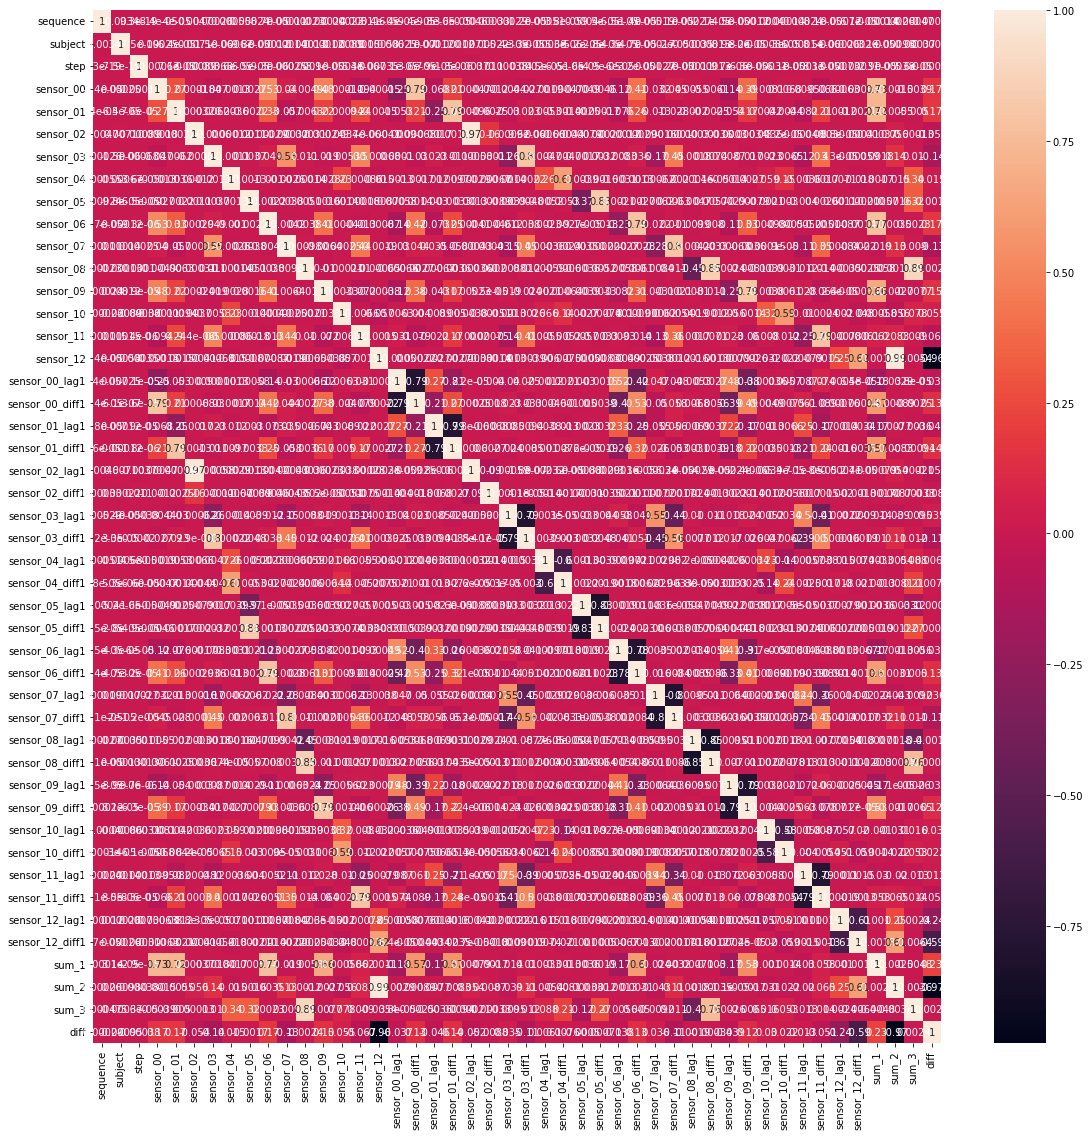

In [42]:
plt.figure(figsize=(19,19))
sns.heatmap(train_2.corr(),annot=True)

In [43]:
train=train_2
groups = train["sequence"]
train = train.drop(["sequence", "subject", "step"], inplace=False, axis=1).values
test = test.drop(["sequence", "subject", "step"], inplace=False, axis=1).values
labels = train_labels["state"]
labels=labels.drop(no_adfs,axis=0)

# ensemble

In [44]:
"""def get_score(model,Xtr,Xt,ytr,yt):
    model.fit(Xtr,ytr)
    pred=model.predict(Xt)
    return roc_auc_score(yt, pred)"""

'def get_score(model,Xtr,Xt,ytr,yt):\n    model.fit(Xtr,ytr)\n    pred=model.predict(Xt)\n    return roc_auc_score(yt, pred)'

In [45]:
"""from xgboost import XGBRegressor as x
from sklearn.model_selection import KFold
kf=KFold(n_splits=5)
for train_i,test_i in kf.split(list(train.index)):
    Xtr=train.iloc[list(train_i)]
    Xt=train.iloc[list(test_i)]
    ytr=labels.iloc[list(train_i)]
    yt=labels.iloc[list(test_i)]
    model=x()
    print(get_score(model,Xtr,Xt,ytr,yt),get_score(model,train[features],Xt,train[target],yt))"""

'from xgboost import XGBRegressor as x\nfrom sklearn.model_selection import KFold\nkf=KFold(n_splits=5)\nfor train_i,test_i in kf.split(list(train.index)):\n    Xtr=train.iloc[list(train_i)]\n    Xt=train.iloc[list(test_i)]\n    ytr=labels.iloc[list(train_i)]\n    yt=labels.iloc[list(test_i)]\n    model=x()\n    print(get_score(model,Xtr,Xt,ytr,yt),get_score(model,train[features],Xt,train[target],yt))'

# bi-lstm rNN training

In [46]:
train = train.reshape(int(len(train)/60), 60, cols)
test = test.reshape(int(len(test)/60), 60, cols)

In [47]:
train.shape
#len(train)

(23255, 60, 43)

In [48]:
cv_score = 0
test_preds = []
kf = GroupKFold(n_splits=5)
for fold_idx, (train_idx, valid_idx) in enumerate(kf.split(train, labels, groups.unique())):
    
    print("*"*15, f"Fold {fold_idx+1}", "*"*15)
    
    X_train, X_valid = train[train_idx], train[valid_idx]
    y_train, y_valid = labels.iloc[train_idx].values, labels.iloc[valid_idx].values
    
    lr = keras.callbacks.ReduceLROnPlateau(monitor="val_auc", factor=0.5,patience=5, verbose=True)
    es = keras.callbacks.EarlyStopping(monitor="val_auc", patience=8,verbose=True, mode="max",restore_best_weights=True)
    model = dnn_model()#dnn_model()
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics='AUC')
    model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20, batch_size=256,verbose=True, 
              callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),lr,es])
    
    cv_score += roc_auc_score(y_valid, model.predict(X_valid).squeeze())
    print(cv_score/(1+fold_idx),roc_auc_score(labels, model.predict(train)))
    print("{_|_|_}")
    test_preds.append(model.predict(test).squeeze())
    
print(cv_score/5)

*************** Fold 1 ***************


2022-06-14 21:32:51.719936: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-14 21:32:51.812460: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-14 21:32:51.813201: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-14 21:32:51.814350: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/20


2022-06-14 21:33:08.665895: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


73/73 [==============================] - 39s 350ms/step - loss: 0.5829 - auc: 0.7643 - val_loss: 0.4381 - val_auc: 0.8767
Epoch 2/20
73/73 [==============================] - 23s 312ms/step - loss: 0.4087 - auc: 0.8949 - val_loss: 0.4030 - val_auc: 0.9222
Epoch 3/20
73/73 [==============================] - 23s 313ms/step - loss: 0.3140 - auc: 0.9392 - val_loss: 0.3298 - val_auc: 0.9357
Epoch 4/20
73/73 [==============================] - 23s 312ms/step - loss: 0.2743 - auc: 0.9539 - val_loss: 0.3084 - val_auc: 0.9429
Epoch 5/20
73/73 [==============================] - 23s 312ms/step - loss: 0.2407 - auc: 0.9646 - val_loss: 0.3484 - val_auc: 0.9544
Epoch 6/20
73/73 [==============================] - 23s 312ms/step - loss: 0.2044 - auc: 0.9746 - val_loss: 0.2770 - val_auc: 0.9559

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/20
73/73 [==============================] - 23s 312ms/step - loss: 0.1413 - auc: 0.9876 - val_loss: 0.2584 - val_auc: 0.9630

In [49]:
a=roc_auc_score(labels[int(len(labels)/1000):int(len(labels)/1)], model.predict(train[int(len(labels)/1000):int(len(labels)/1)]))

In [50]:
a

0.9893721604250426

In [51]:
submission=pd.read_csv("../input/tabular-playground-series-apr-2022/sample_submission.csv")

<AxesSubplot:ylabel='Count'>

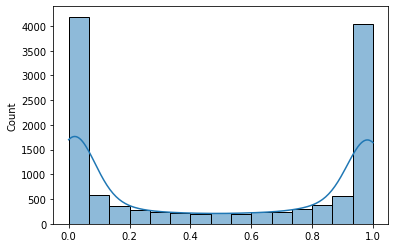

In [52]:
submission["state"] = sum(test_preds)/(5)
ans=[]
for i in submission["state"]:
    ans.append(i)
y=[i/100 for i in range(0,len(ans))]
#plt.figure(figsize=(12,12))
sns.histplot(ans,kde=True)

In [53]:
submission["state"] =ans

In [54]:
submission.to_csv("submission.csv", index=False)
submission

sequence     state
0         25968  0.983467
1         25969  0.997447
2         25970  0.000434
3         25971  0.827431
4         25972  0.392420
...         ...       ...
12213     38181  0.155636
12214     38182  0.493415
12215     38183  0.186083
12216     38184  0.001926
12217     38185  0.000995

[12218 rows x 2 columns]

27)
no/cum/allover
1. 0.964270 0.986066
2. 0.963056 0.986797
3. 0.963164 0.986134
4. 0.962730 0.984839
5. 0.962141 0.985073

28)no/cum/allover
1. 0.966718 0.985501
2. 0.964210 0.97889
3. 0.962745 0.984175
4. 0.962804 0.983168
5. 0.961684 0.97622


29) 0.958(recent)
1. 0.964171 0.989094
2. 0.965284 0.990147
3. 0.965110 0.988886
4. 0.965273 0.989805
5. 0.963674 0.989546
